In [1]:
import numpy as np
from spec_id import Gen_spec, Median_w_Error_cont
import matplotlib.pyplot as plt
from vtl.Photo import Photometry
from glob import glob
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [69]:
def Magnitude(flam):
    mag=-2.5*np.log10(flam)
    return mag

def Bootstrap_errors(f098,f850,M_f098,M_f850,its=1000):
    C_grid = np.zeros(its)
    IDs = np.arange(len(f850))
    for i in range(its):
        IDn = np.random.choice(IDs,len(IDs),replace=True)
        Dcolor=Magnitude((f850[IDn]*M_f098[IDn])/ (M_f850[IDn]*f098[IDn]))
        C_grid[i]=np.median(Dcolor)
    sea.distplot(C_grid)
    m_fit = np.median(C_grid)
    low_ers = np.sort(C_grid)[160]
    hi_ers = np.sort(C_grid)[840]
    
    return m_fit,low_ers,hi_ers

In [4]:
fDB = pd.read_pickle('../data/filter_db.pkl')

In [10]:
fDB

,M_F098,M_F098_err,M_F850,M_F850_err,N_F085,N_F850_err,S_F098,S_F098_err,S_F850,S_F850_C,S_F850_C_err,S_F850_err,gids
43,9.769333e-19,2.634086e-19,-9.900000e+01,-9.900000e+01,5.286964,0.047748,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n14713
49,2.098037e-18,1.445953e-19,1.747697e-18,2.422580e-19,13.888487,0.057810,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n16758
50,1.776399e-18,1.546954e-15,1.460517e-18,4.796781e-16,11.737332,0.045581,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n17070
58,3.732585e-19,2.511762e-19,3.264858e-19,3.000168e-19,2.900199,0.043631,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n19442
61,2.669737e-18,1.229185e-19,2.007763e-18,1.914146e-19,14.816056,0.065226,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n21156
62,6.894339e-19,2.779345e-19,-9.900000e+01,-9.900000e+01,3.911611,0.050748,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n21427
69,7.516320e-19,1.728003e-19,-9.900000e+01,-9.900000e+01,4.026039,0.051848,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n23435
86,1.314887e-18,1.625707e-19,1.119979e-18,2.683114e-19,8.267406,0.063951,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n32566
96,2.779187e-18,1.763211e-19,2.231156e-18,3.143401e-19,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n34694
107,1.752857e-18,1.496945e-19,1.319187e-18,2.338029e-19,9.538568,0.051461,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n37686


In [12]:
flam_098 = []
flam_098_err = []
flam_850 = []
flam_850_err = []

effwv_098 = 9840.877482
effwv_850 = 9001.008862

for i in fDB.index:
    f= fDB['S_F098'][i]
    err= fDB['S_F098_err'][i]
    Clam = 3E18/effwv_098**2
    fnu = 10**(-29.44+np.log10(f))
    errnu = 10**(-29.44+np.log10(err))
    flam = Clam * fnu
    errlam = Clam * errnu
    flam_098.append(flam)
    flam_098_err.append(errlam)

    
    f= fDB['S_F850'][i]
    err= fDB['S_F850_err'][i]
    Clam = 3E18/effwv_850**2
    fnu = 10**(-29.44+np.log10(f))
    errnu = 10**(-29.44+np.log10(err))
    flam = Clam * fnu
    errlam = Clam * errnu
    flam_850.append(flam)
    flam_850_err.append(errlam)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


In [13]:
fDB['flam_F098'] = flam_098
fDB['flam_F098_err'] = flam_098_err
fDB['flam_F850'] = flam_850
fDB['flam_F850_err'] = flam_850_err

In [16]:
pd.to_pickle(fDB,'../data/filter_db.pkl')

In [45]:
fDB2 = fDB.query('S_F098>0')
fDB2 = fDB2.query('M_F850>0')

In [18]:
fDB2.columns

Index([u'M_F098', u'M_F098_err', u'M_F850', u'M_F850_err', u'N_F085',
       u'N_F850_err', u'S_F098', u'S_F098_err', u'S_F850', u'S_F850_C',
       u'S_F850_C_err', u'S_F850_err', u'gids', u'flam_F098', u'flam_F098_err',
       u'flam_F850', u'flam_F850_err'],
      dtype='object')

In [46]:
SN = []

for i in fDB2.index:
    spec = Gen_spec(fDB2['gids'][i], float(galDB['hi_res_specz'][galDB['gids'] == fDB2['gids'][i]]), maxwv=11400)
    fl = np.trapz(spec.gal_fl,spec.gal_wv)
    er = np.trapz(spec.gal_er,spec.gal_wv)
    SN.append(fl/er)

../data/galaxy_flts/s38785_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s38785_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s38785_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s38785_flt: save ../data/galaxy_flts/s38785_flt.detect_seg.fits, ../data/galaxy_flts/s38785_flt.detect.cat
../data/galaxy_flts/s39170_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39170_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39170_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39170_flt: save ../data/galaxy_flts/s39170_flt.detect_seg.fits, ../dat

In [44]:
print fDB2['M_F850']

217    1.225968e-18
219   -9.900000e+01
220    4.039693e-18
221    2.143670e-18
223    1.461901e-18
224    8.824926e-19
225   -9.900000e+01
227    2.418658e-19
228    8.956508e-19
230    2.230325e-18
231    3.919642e-19
232   -9.900000e+01
234    2.678728e-19
235   -9.900000e+01
236    1.548682e-19
246    1.035546e-18
248    5.150677e-19
258    2.011440e-18
259   -9.900000e+01
270    1.673274e-18
Name: M_F850, dtype: float64


In [47]:
Color = []
Color_sig = []
M_Color = []
M_Color_sig = []
D_Color_sig = []
beta = (2.5/np.log(10))**2
for i in fDB2.index:
    Color.append(Magnitude(fDB2['flam_F850'][i]/fDB2['flam_F098'][i]))
    Color_sig.append(np.sqrt(beta*((fDB2['flam_F098_err'][i]/fDB2['flam_F098'][i])**2 + 
                                   (fDB2['flam_F850_err'][i]/fDB2['flam_F850'][i])**2)))
    M_Color.append(Magnitude(fDB2['M_F850'][i]/fDB2['M_F098'][i]))
    M_Color_sig.append(np.sqrt(beta*((fDB2['M_F098_err'][i]/fDB2['M_F098'][i])**2 + 
                                     (fDB2['M_F850_err'][i]/fDB2['M_F850'][i])**2)))
    D_Color_sig.append(np.sqrt(beta*((fDB2['M_F098_err'][i]/fDB2['M_F098'][i])**2 + 
                                     (fDB2['M_F850_err'][i]/fDB2['M_F850'][i])**2)+
                               (fDB2['flam_F098_err'][i]/fDB2['flam_F098'][i])**2 + 
                               (fDB2['flam_F850_err'][i]/fDB2['flam_F850'][i])**2))
D_Color = np.array(Color) - np.array(M_Color)

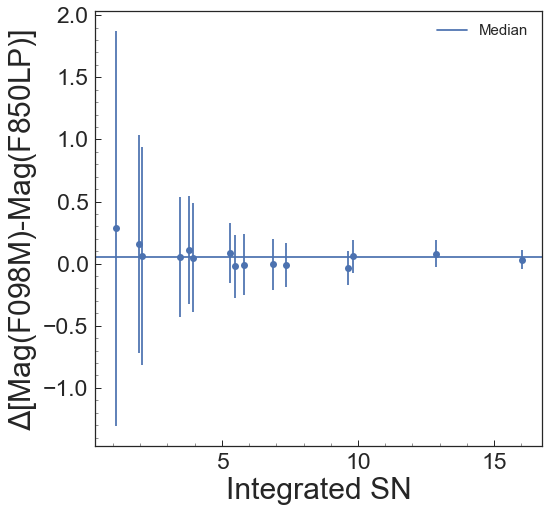

In [92]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.errorbar(SN,D_Color,D_Color_sig,fmt='o')
plt.axhline(.05,label = 'Median')
# plt.fill_between(np.sort(SN),np.repeat(.031,len(SN)),np.repeat(.061,len(SN)),color = 'g', alpha =.2,label = '68% confidence region')
plt.ylabel('$\Delta$[Mag(F098M)-Mag(F850LP)] ',size=30)
plt.xlabel('Integrated SN',size=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.legend(fontsize=15)
plt.show()
plt.close()

0.0537166843432


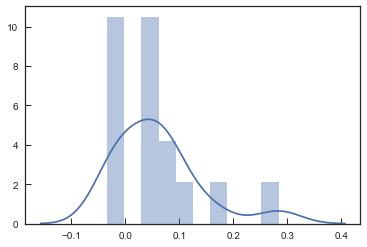

In [51]:
sea.distplot(D_Color,bins=10)
print np.median(D_Color)

(0.053716684343218531, 0.031289895697022486, 0.061215420640801349)

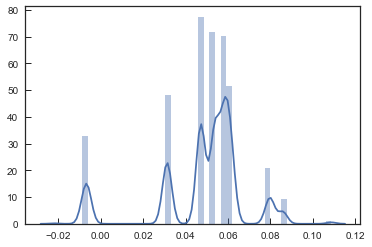

In [70]:
Bootstrap_errors(fDB2['flam_F098'].values,fDB2['flam_F850'].values,fDB2['M_F098'].values,fDB2['M_F850'].values,
                its=1000)